# A numpy implementation of PCA

## The class

In [1]:
import numpy as np

class PCA:
    def __init__(self, normalize=False):
        self.normalize = normalize
        self.vals = None
        self.vecs = None
    
    def transform(self, X):
        # center
        X = self.__center_data(X)
        self.__fit(X)
        
        # project
        return np.dot(X, self.vecs.T)

    def __center_data(self, X):
        X = X - X.mean(axis=0)
        if self.normalize:
            X /= X.std(axis=0)
        return X
    
    def __fit(self, X):
        # covariance
        cov = np.cov(X.T)
        
        # eigenvalues, eigenvectors
        vals, vecs = np.linalg.eig(cov)
        
        # sort eigenvectors
        vecs = vecs.T
        idxs = np.argsort(vals)[::-1]
        self.vals = vals[idxs]
        self.vecs = vecs[idxs]

## Example usage

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

wine = pd.read_csv('example_data/wine.csv')
data = wine.values[:,1:12].astype(float)

In [3]:
pca = PCA(normalize=True)
proj = pca.transform(data)

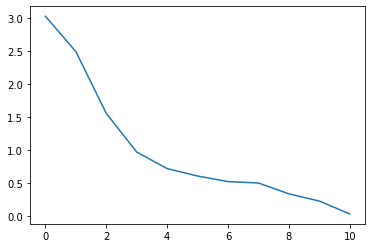

In [4]:
plt.plot(pca.vals)
plt.show()

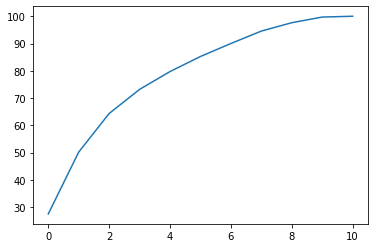

In [5]:
plt.plot(100 * pca.vals.cumsum() / sum(pca.vals), '-')
plt.show()

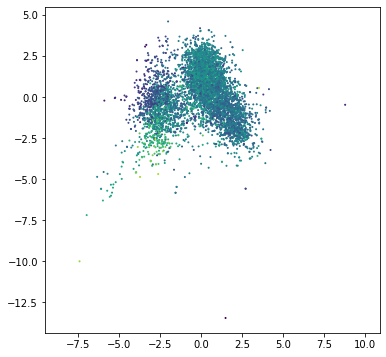

In [6]:
fig, ax = plt.subplots(figsize=(6,6))
ax.axis('equal')
ax.scatter(proj[:,0], proj[:,1], c=proj[:, 2], s=1)
plt.show()

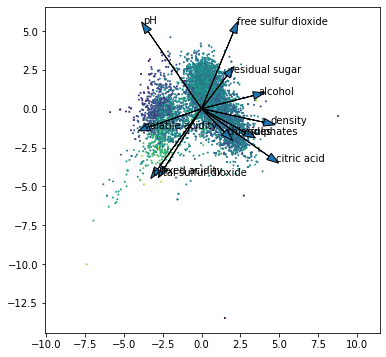

In [7]:
variables = wine.columns[1:12]

fig, ax = plt.subplots(figsize=(6,6))
ax.axis('equal')
ax.scatter(proj[:,0], proj[:,1], c=proj[:, 2], s=1)
for var, (x,y) in zip(variables, 10*pca.vecs[:, :2]):
    ax.arrow(0, 0, x, y, head_width=0.5)
    ax.text(1.1*x, 1.1*y, var)
plt.show()